<h1>Alexis Soto-Colorado</h1>
<ul>
<li>All data is available in CartoDB account (https://asc589.cartodb.com/dashboard/datasets ) for verification, link, or public google drive ( https://drive.google.com/folderview?id=0B9oI9iLTqtY_Y213Y0dzNEZmME0&usp=sharing ) 
<li>All techniques and tools are mention to meet the requirement of reproducibility
<li>Configuration and setting are mention for reproducibility purpose
<li> AND last thing, Happy Holidays! I learn a lot in your class. Thank you

In [1]:
%matplotlib inline

import ast
import json
import urllib
import urllib2
from cStringIO import StringIO
import pandas as pd
import geopandas as gpd
#Graphic Standards
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pysal as ps
import mplleaflet
from IPython.display import HTML
from IPython.display import display


%pylab inline


Populating the interactive namespace from numpy and matplotlib


/Users/alexismsoto-colorado/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))



<h1>Task 1: Querying Asthma Discharges</h1>

In this first task, you are to asked to retrieve the top 5 facility IDs that had the highest count of asthma treatments in 2013. We can assume that any case that is diagnosed as an Asthma treatment should have the word "asthma" (case-insensitive) in the ccs_diagnosis_description of the nyc_discharge_2013. This must be done through a SQL command. In the data section we define a helper function queryCartoDB to wrap around the SQL API of CartoDB. We can simply pass in a public data source (in the form of 'https://{ACCOUNT}.cartodb.com/api/v2/sql', where ACCOUNT is the owner of the data) and a SQL statement for us to query the data in various formats including CSV, JSON, and GeoJSON. There will be three data sources (with table name in parentheses) to be queried from the CartoDB databases: so that you canget data for the New York City Hospital Inpatient 2013 Discharge, Health Facility Information, Highway streets per zip code.

Examples and bits of code you can use are provided in the PUI2015_DATA.ipynb (you can copy an paste code from there into this notebook)

After retrieveing those 5 IDs, please cross-reference them with the IDs listed in the nyc_facility table (this could be done with SQL or offline with GeoPandas using the facilities variable above). Then provide us with the following:

    The list the top 5 facilities by their facility names (aka. the **facility_name** column)
    A map of those 5 facilities in the NAD 83 / New York Long Island (EPSG:2263) coordiantes.



In [2]:
SQL_SOURCE = 'https://htv210.cartodb.com/api/v2/sql'

def queryCartoDB(query, format='CSV', source=SQL_SOURCE):
    data = urllib.urlencode({'format': format, 'q': query})
    try:
        response = urllib2.urlopen(source, data)
    except urllib2.HTTPError, e:
        raise ValueError('\n'.join(ast.literal_eval(e.readline())['error']))
    except Exception:
        raise
    return StringIO(response.read())

In [3]:
# Task 1: Querying Asthma Discharges 
# 128 is the diagnostic for asthma

dischargeQuery = '''
SELECT facility_id, Count(ccs_diagnosis_code)
FROM nyc_discharge_2013
WHERE ccs_diagnosis_code = 128
GROUP By facility_id
ORDER By COUNT(ccs_diagnosis_code) DESC
LIMIT 5

'''

dischargeStream = queryCartoDB(dischargeQuery, format='CSV')
discharge       = pd.read_csv(dischargeStream)
discharge.head()



,facility_id,count
0,1172,1878
1,1169,1786
2,1301,1057
3,1165,920
4,1178,890


In [4]:
discharge

,facility_id,count
0,1172,1878
1,1169,1786
2,1301,1057
3,1165,920
4,1178,890


In [5]:
facilityQuery = '''
SELECT *
FROM nyc_facilities
WHERE facility_id = 1172 OR facility_id = 1169 OR facility_id = 1301 OR facility_id = 1165 OR facility_id = 1178
LIMIT 5
'''
facilityStream = queryCartoDB(facilityQuery, format='GeoJSON')
facilityData   = json.loads(facilityStream.read())
facilities     = gpd.GeoDataFrame.from_features(facilityData['features'])
facilities.head()
facilities


,cartodb_id,cooperator_address,cooperator_address_2,cooperator_city,cooperator_name,cooperator_state,cooperator_zip_code,description,facility_address_1,facility_address_2,...,operator_address_1,operator_address_2,operator_city,operator_name,operator_state,operator_zip_code,ownership_type,regional_office,regional_office_id,short_description
0,624,,,,,New York,NaN,Hospital,1400 Pelham Parkway,,...,125 Worth Street,,New York,New York City Health and Hospital Corporation,New York,10013,Municipality,Metropolitan Area Regional Office - New York City,5,HOSP
1,627,111 East 210th Street,,Bronx,Montefiore Medical Center,New York,10467,Hospital,111 East 210th Street,,...,111 East 210th Street,,Bronx,"Montefiore Health System, Inc",New York,10467,Not for Profit Corporation,Metropolitan Area Regional Office - New York City,5,HOSP
2,628,,,,,New York,NaN,Hospital,234 East 149th Street,,...,125 Worth Street,,New York,New York City Health and Hospital Corporation,New York,10013,Municipality,Metropolitan Area Regional Office - New York City,5,HOSP
3,631,,,,,New York,NaN,Hospital,1650 Grand Concourse,,...,1276 Fulton Avenue,,Bronx,Bronx Lebanon Hospital Center Inc,New York,10456,Not for Profit Corporation,Metropolitan Area Regional Office - New York City,5,HOSP
4,696,,,,,New York,NaN,Hospital,451 Clarkson Avenue,,...,125 Worth Street,,New York,New York City Health and Hospital Corporation,New York,10013,Municipality,Metropolitan Area Regional Office - New York City,5,HOSP


In [6]:
#Five Zip Code and Name of the health facilities with asthma cases
Top5_asma = facilities[['facility_name','facility_zip_code','facility_latitude','facility_longitude','facility_id']]

In [7]:
Top5_asma

,facility_name,facility_zip_code,facility_latitude,facility_longitude,facility_id
0,Jacobi Medical Center,10461,40.857388,-73.846741,1165
1,Montefiore Medical Center - Henry & Lucy Moses...,10467,40.879951,-73.880562,1169
2,Lincoln Medical & Mental Health Center,10451,40.817661,-73.924210,1172
3,Bronx-Lebanon Hospital Center - Concourse Divi...,10457,40.843609,-73.911545,1178
4,Kings County Hospital Center,11203,40.655823,-73.944099,1301


In [8]:
#Five Facilities Output to my CartoDB account 
#output to csv
Top5_asma.to_csv('hosp_asma.csv')

#Loaded to https://asc589.cartodb.com/tables/hosp_asma/table

In [9]:
#Five Top 5 Health Facilities with Mosth Asthma Cases
#Displaying CartoDB Map in my Ipython Notebook
#It is an interactive map
HTML('<iframe width="100%" height="520" frameborder="0" src="https://asc589.cartodb.com/viz/9a59a018-a788-11e5-8c95-0ea31932ec1d/embed_map" allowfullscreen webkitallowfullscreen mozallowfullscreen oallowfullscreen msallowfullscreen></iframe>')


<h1>Task 2: Geo-referencing the facilities with the zip code highway profile</h1>

In this task, you are to asked to find out which zip code the top 5 facilities found in Task 1 belong to, and how many miles of highway streets are within its proximity. To determine which zip code a facility belongs to, you can either use SQL or GeoPandas. Your results have to be

    a list of 5 facilities (like in Task 1.1) but with two additional columns: the ZIP code and the total highway miles belonging to that zip code.
    a map (cloropleth) of highway length for all NYC ZIP codes.



In [10]:
zipcodeQuery = '''
SELECT *
FROM nyc_zipcode_highway
WHERE zipcode = 10461 OR zipcode = 10467 OR zipcode = 10451 OR zipcode = 10457 OR zipcode = 11203
LIMIT 5
'''
zipcodeStream = queryCartoDB(zipcodeQuery, format='GeoJSON')
zipcodeData   = json.loads(zipcodeStream.read())
zipcodes      = gpd.GeoDataFrame.from_features(zipcodeData['features'])
zipcodes.head()



,cartodb_id,geometry,highway_length,zipcode
0,106,"(POLYGON ((-73.863293 40.89529, -73.862875 40....",19.172015,10467
1,111,"(POLYGON ((-73.931681 40.807955, -73.931704 40...",7.914185,10451
2,123,"(POLYGON ((-73.897516 40.856183, -73.896533000...",5.017199,10457
3,125,"(POLYGON ((-73.82612399999999 40.834214, -73.8...",18.102258,10461
4,195,"(POLYGON ((-73.942503 40.638965, -73.943986 40...",2.212840,11203


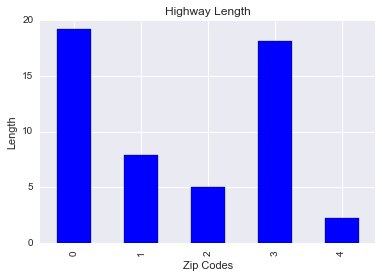

In [11]:
#Plotting 
zipcodes['highway_length'].plot(kind='bar')
pyplot.title('Highway Length')
pyplot.xlabel('Zip Codes')
pyplot.ylabel('Length')

In [12]:
#Creating Output for CartoDB Mapping(Map 2) 
zipcodes.to_csv('zip_highways.csv')

#Loaded into CartoDB  https://asc589.cartodb.com/tables/highways_length_of_nyc

In [13]:
#Map (cloropleth) of highway length for all NYC ZIP codes
#Displaying CartoDB Map in my Ipython Notebook
HTML('<iframe width="100%" height="520" frameborder="0" src="https://asc589.cartodb.com/viz/1f9421a4-a793-11e5-8aed-0ecfd53eb7d3/embed_map" allowfullscreen webkitallowfullscreen mozallowfullscreen oallowfullscreen msallowfullscreen></iframe>')

<h1>TASK 4:</h1>

Access to green space: find all information about size and location of NYC parks (see PUI2015_DATA.ipynb). Design an appropriate metric that describes the access to green spaces per zip code. This should take into account the size of nearby parks as well as the distance to them. Suggestions are given to you in the hints file. Your results should be:
a dataframe like the one derived in TASK 3 but with an additional column: the access to park for the zip codes of the 5 identified facilities.
choropleth of your 'access to green spaces metric' per for all ZIP codes in NYC



<h3>1.First Step Get Data and Centroid</h3>
<ol>
<li>Figure out centroids of the zip codes. 
<li>Used "QGIS Python Plugin RealCentroid" from MMQGIS. It gets all the centroid of all zip codes of the shapefile. More information about the Python QGIS plugin is in:  http://michaelminn.com/linux/mmqgis/
<li>See image for configuration and setting
<li>The Parks and Open Space shapefile come from the Department of Env. Proctection NYC 
https://data.cityofnewyork.us/Environment/DEP-Green-Infrastructure/496p-fwvq

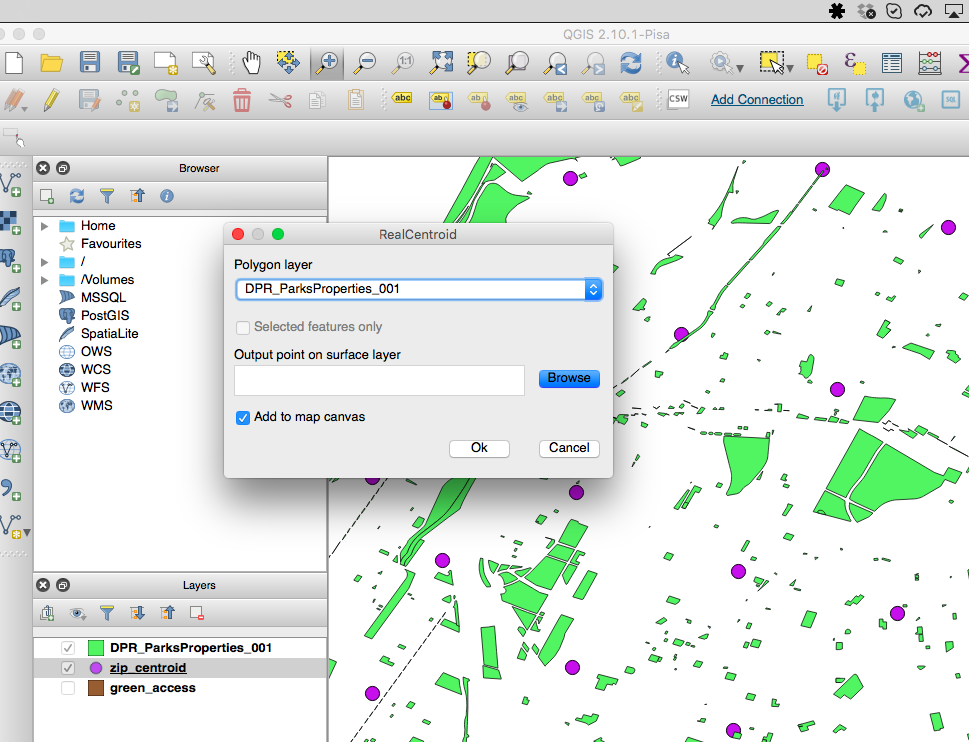

In [14]:
from IPython.display import Image
Image(filename='centroid.png') 

<h3>2. "Distance to the nearest hub" from QGIS where used to figure the distance from centroid to green space</h3>
<ul>
<li>Used the "Distance to nearest hub" to model the distance between poin(centroid of the zip code)
<li>Configuration and setting are in the image below
<li>More information https://docs.qgis.org/2.6/en/docs/user_manual/processing_algs/qgis/vector_analysis_tools/distancetonearesthub.html

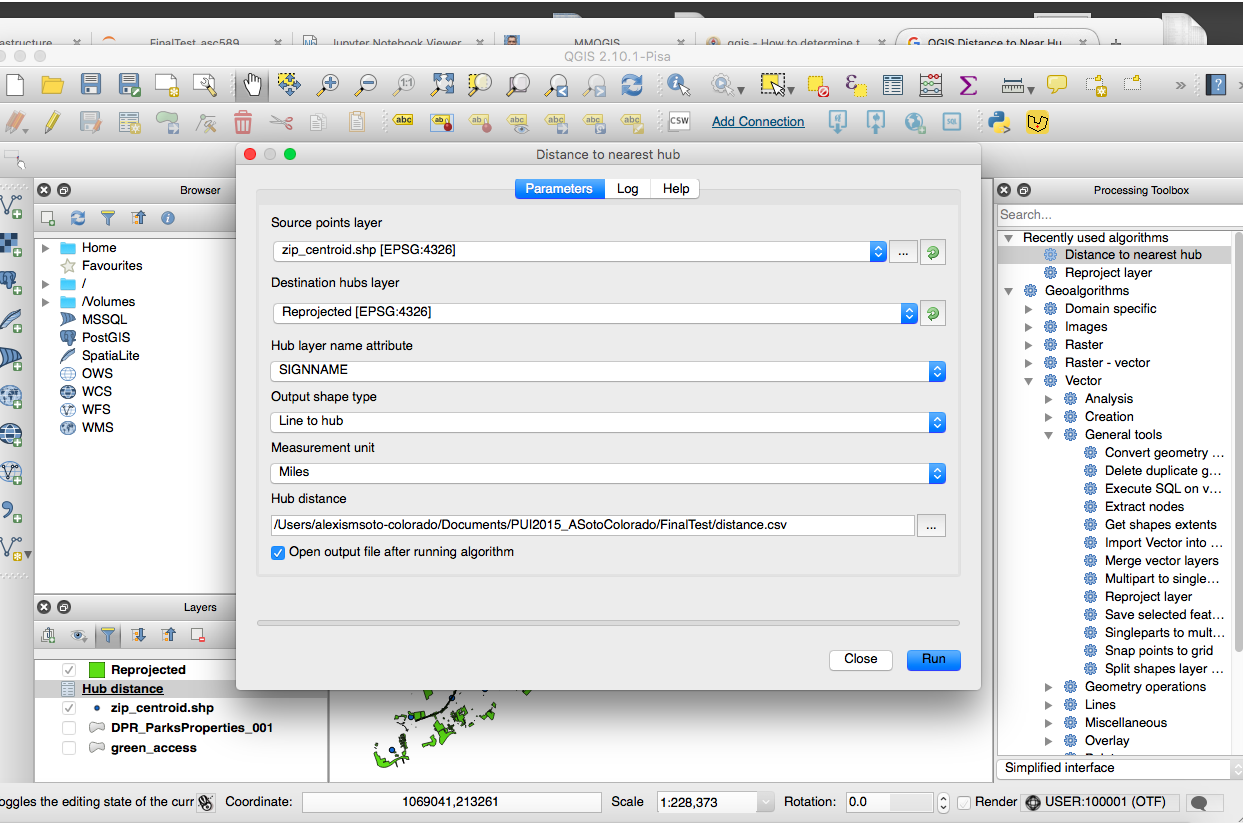

In [15]:
Image(filename='hub.png') 


In [16]:
#The result was save in csv in form miles
green_metric = pd.read_csv('distance.csv')
green_metric.head()

,cartodb_id,zipcode,cartodb_ge,HubName,HubDist
0,1,10314,1,Willowbrook Park,7.675990e-06
1,2,10112,1,Father Duffy Square,3.294837e-06
2,19,10041,0,Vietnam Veterans Plaza,1.200630e-07
3,34,10177,1,Park Avenue Malls,2.988986e-06
4,36,10020,1,Father Duffy Square,3.066231e-06


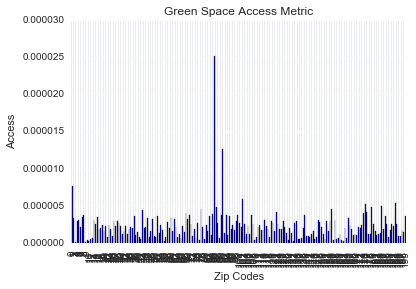

In [17]:
#Plotting
green_metric['HubDist'].plot(kind='bar')
pyplot.title('Green Space Access Metric')
pyplot.xlabel('Zip Codes')
pyplot.ylabel('Access')

In [18]:
#Displaying CartoDB Map in my Ipython Notebook
HTML('<iframe width="100%" height="520" frameborder="0" src="https://asc589.cartodb.com/viz/9a813ef2-a7c4-11e5-9781-0e674067d321/embed_map" allowfullscreen webkitallowfullscreen mozallowfullscreen oallowfullscreen msallowfullscreen></iframe>')

<h1>Task 5</h1>

Environmental conditions: find the 311 data (see PUI2015_DATA.ipynb). Where and how to select it is described in the Data section and in the hints we give recommendations on how to preprocess the data. Use the 'normalized 311' data (see hints) and return:
a dataframe like the one derived in TASK 4 but with an additional column containing this information
make a choropleth of the normalized 311 calls relevant to environmental conditions per for all ZIP codes in NYC


<h3>1. Get the data</h3>
<ul>
<li>Got the data from Open NYC Website https://nycopendata.socrata.com/Social-Services/Housing-Complaints/i3j2-v52s
<li>The year of the data is 2014
<li>Al the suggested complaints were used except abesto and lead since those material causes cancer, and not asthma.
<li>NYC API were used in the query of the data.

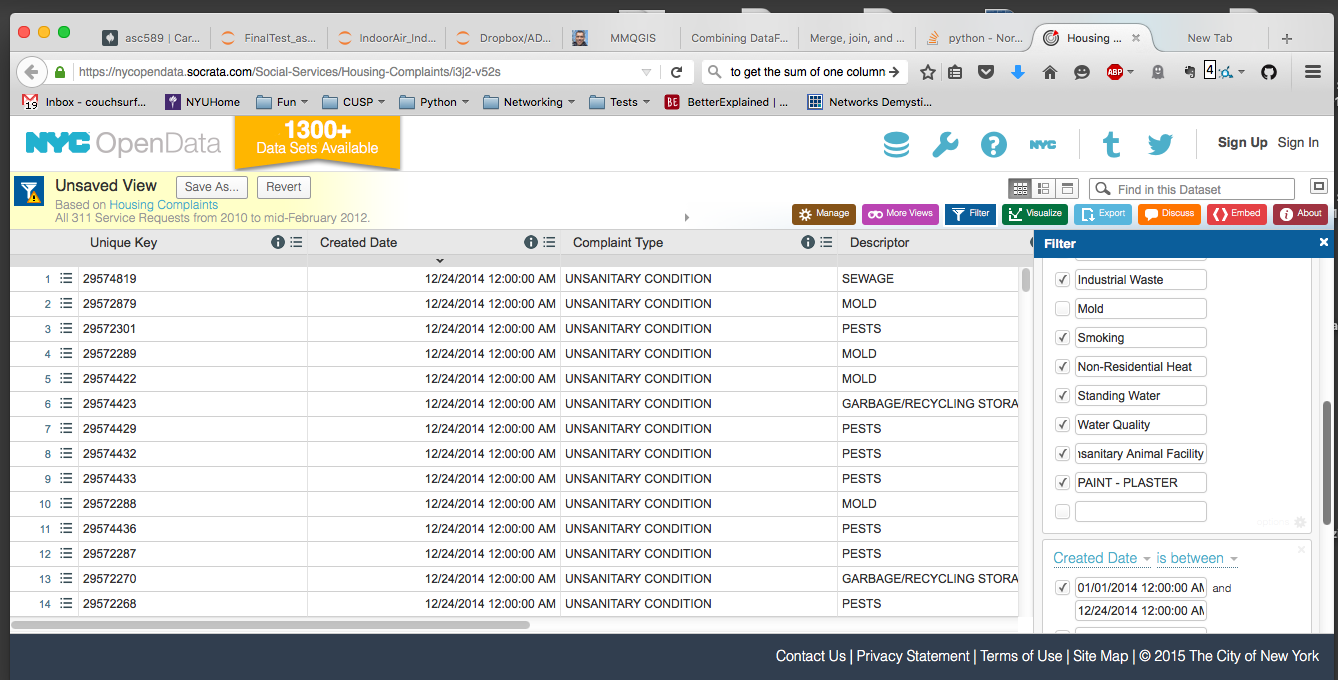

In [19]:
#NYC OpenData
Image(filename='311.png') 

<h3>In case that GitHub have limited capacity. All the input files are available at: 
    https://drive.google.com/folderview?id=0B9oI9iLTqtY_Y213Y0dzNEZmME0&usp=sharing  </h3>

        

In [20]:
#Loading CSV of complaints related to asthma from 2014
#Housing Complaints is also in the Google Drive

codeCount = pd.read_csv('Housing_Complaints.csv')

In [21]:
#Verification of the data
codeCount.describe()

,Unique Key,Incident Zip,Latitude,Longitude
count,170304.000000,170266.000000,170266.000000,170266.000000
mean,27759541.190506,10738.705067,40.757217,-73.919550
std,734550.195386,507.098246,0.092584,0.055394
min,27018868.000000,10001.000000,40.503738,-74.250057
25%,27223247.750000,10453.000000,40.671197,-73.951871
50%,27424345.000000,10468.000000,40.763646,-73.921432
75%,28297442.250000,11223.000000,40.843413,-73.890974
max,29575149.000000,11697.000000,40.910189,-73.700958


In [22]:
#Group By and Sum 

codeAsma = codeCount.groupby(['Incident Zip']).agg(['count'])

In [23]:
codeAsma.head()

,Unique Key,Created Date,Complaint Type,Descriptor,Latitude,Longitude
,count,count,count,count,count,count
Incident Zip,,,,,,
10001,222,222,222,222,222,222
10002,739,739,739,739,739,739
10003,786,786,786,786,786,786
10004,14,14,14,14,14,14
10005,23,23,23,23,23,23


In [24]:
codeAsma.describe()

,Unique Key,Created Date,Complaint Type,Descriptor,Latitude,Longitude
,count,count,count,count,count,count
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,930.415301,930.415301,930.415301,930.415301,930.415301,930.415301
std,1191.378803,1191.378803,1191.378803,1191.378803,1191.378803,1191.378803
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
50%,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000
75%,1176.500000,1176.500000,1176.500000,1176.500000,1176.500000,1176.500000
max,6025.000000,6025.000000,6025.000000,6025.000000,6025.000000,6025.000000


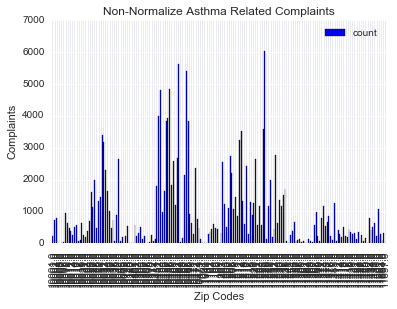

In [25]:
#Plotting to visualize un-normalize data
codeAsma['Unique Key'].plot(kind='bar')
pyplot.title('Non-Normalize Asthma Related Complaints')
pyplot.xlabel('Zip Codes')
pyplot.ylabel('Complaints')


In [26]:
#Creating Output 
codeAsma.to_csv('asma.csv')

<h3>In case that GitHub have limited capacity. All the input files are available at: 
    https://drive.google.com/folderview?id=0B9oI9iLTqtY_Y213Y0dzNEZmME0&usp=sharing  </h3>

In [27]:
#Get all complaints(Related and Non-REelate to asthma) by zip code to normalize
#Data Available at 
all_311 = pd.read_csv('Housing_Complaints(3).csv')

In [28]:
#Group By and Sum 

allCount = all_311.groupby(['Incident Zip']).agg(['count'])


In [29]:
allCount.head()

,Unique Key,Created Date,Complaint Type,Descriptor,Latitude,Longitude
,count,count,count,count,count,count
Incident Zip,,,,,,
10001,1444,1444,1444,1444,1444,1444
10002,3241,3241,3241,3241,3241,3241
10003,3371,3371,3371,3371,3371,3371
10004,85,85,85,85,85,85
10005,94,94,94,94,94,94


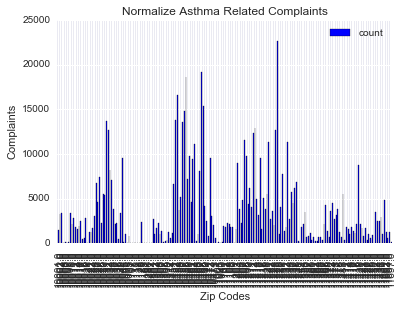

In [30]:
#Plotting to visualize un-normalize data
allCount['Unique Key'].plot(kind='bar')
pyplot.title('Normalize Asthma Related Complaints')
pyplot.xlabel('Zip Codes')
pyplot.ylabel('Complaints')


In [31]:
#Data Merge done with CartoDB
#Data Open and Avaialable in: https://asc589.cartodb.com/tables/norm_asma
asma_norm = pd.read_csv('norm_asma.csv')

In [32]:
asma_norm.head()

,cartodb_id,the_geom,incident_zip,unique_key,asma_incident_zip,asma_unique_key,norm_asma
0,1,0101000020E61000000000000000909640000000000090...,10001,1444,10001,222,0.153740
1,2,0101000020E6100000FFFFFFFFFF51A940FFFFFFFFFF51...,10002,3241,10002,739,0.228016
2,3,0101000020E6100000FFFFFFFFFF55AA40FFFFFFFFFF55...,10003,3371,10003,786,0.233165
3,4,0101000020E61000000000000000405540000000000040...,10004,85,10004,14,0.164706
4,5,0101000020E61000000000000000805740000000000080...,10005,94,10005,23,0.244681


In [33]:
#Map goes here
HTML('<iframe width="100%" height="520" frameborder="0" src="https://urbanplanner42.cartodb.com/viz/fe077eda-a929-11e5-90bf-0e3ff518bd15/embed_map" allowfullscreen webkitallowfullscreen mozallowfullscreen oallowfullscreen msallowfullscreen></iframe>')

<h1>TASK 6:</h1>
create a regression model for the 5 zip codes that includes at least 2 of the variables (fewer than 2 will not allow a passing grade): highway length in the zip code, exposure to violent crimes in that zip code, access to green spaces in that zip code, 311-normalized calls in that zip code.
Report the statistics for your model and assess how well it describes the dependent variable.

In [34]:
#Re-Cap Variables

#Dependable: Discharge  "Asma Cases from the Top 5 Health Facilities"

Top5_asma

,facility_name,facility_zip_code,facility_latitude,facility_longitude,facility_id
0,Jacobi Medical Center,10461,40.857388,-73.846741,1165
1,Montefiore Medical Center - Henry & Lucy Moses...,10467,40.879951,-73.880562,1169
2,Lincoln Medical & Mental Health Center,10451,40.817661,-73.924210,1172
3,Bronx-Lebanon Hospital Center - Concourse Divi...,10457,40.843609,-73.911545,1178
4,Kings County Hospital Center,11203,40.655823,-73.944099,1301


In [35]:
#First Independent Vairable "Access to Green Spaces"
green_metric.head()

,cartodb_id,zipcode,cartodb_ge,HubName,HubDist
0,1,10314,1,Willowbrook Park,7.675990e-06
1,2,10112,1,Father Duffy Square,3.294837e-06
2,19,10041,0,Vietnam Veterans Plaza,1.200630e-07
3,34,10177,1,Park Avenue Malls,2.988986e-06
4,36,10020,1,Father Duffy Square,3.066231e-06


In [36]:
#Second Indepedent Variable "311 Complaints"
asma_norm.head()

,cartodb_id,the_geom,incident_zip,unique_key,asma_incident_zip,asma_unique_key,norm_asma
0,1,0101000020E61000000000000000909640000000000090...,10001,1444,10001,222,0.153740
1,2,0101000020E6100000FFFFFFFFFF51A940FFFFFFFFFF51...,10002,3241,10002,739,0.228016
2,3,0101000020E6100000FFFFFFFFFF55AA40FFFFFFFFFF55...,10003,3371,10003,786,0.233165
3,4,0101000020E61000000000000000405540000000000040...,10004,85,10004,14,0.164706
4,5,0101000020E61000000000000000805740000000000080...,10005,94,10005,23,0.244681


In [37]:
#Available in my GITHub account (https://github.com/UrbanPlanner42/PUI2015_ASotoColorado/tree/master/FinalTest)
data_reg = pd.read_csv('regression_clear.csv', index_col=0 )

In [38]:
data_reg

,the_geom,facility_latitude,facility_longitude,facility_name,facility_zip_code,field_1,incident_zip,norm_asma,hubdist,Asma_Cases
cartodb_id,,,,,,,,,,
63,0101000020E6100000843D03F3727952C0C2B81B446B6C...,40.843609,-73.911545,Bronx-Lebanon Hospital Center - Concourse Divi...,10457,3,10457,0.265434,0.000001,890
121,0101000020E61000009D11A5BDC17752C0F241CF66D56F...,40.879951,-73.880562,Montefiore Medical Center - Henry & Lucy Moses...,10467,1,10467,0.280647,0.000003,1786
143,0101000020E610000029AA84F5377B52C002965CC5E268...,40.817661,-73.924210,Lincoln Medical & Mental Health Center,10451,2,10451,0.268212,0.000002,1878
151,0101000020E610000004CBA2FBC47B52C060A758350853...,40.655823,-73.944099,Kings County Hospital Center,11203,4,11203,0.283529,0.000002,1057
197,0101000020E6100000E7FBA9F1D27552C03108AC1C5A6C...,40.857388,-73.846741,Jacobi Medical Center,10461,0,10461,0.257389,0.000004,920


In [39]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Getting Variables for the Regression
X = data_reg[['norm_asma', 'hubdist']]
y = data_reg['Asma_Cases']

## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

est.summary()



/Users/alexismsoto-colorado/anaconda/lib/python2.7/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Asma_Cases   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                 -0.735
Method:                 Least Squares   F-statistic:                    0.1530
Date:                Mon, 04 Jan 2016   Prob (F-statistic):              0.867
Time:                        11:59:52   Log-Likelihood:                -37.104
No. Observations:                   5   AIC:                             80.21
Df Residuals:                       2   BIC:                             79.04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -3287.7955   8324.470     -0.395      0.731     -3.91e+04  3.25e+04
norm_asma   1.653e+04   2.99e+04      0.553      0.636     -1.12e+05  1.45e+05
hubdist     4.653e+07   3.61e+08      0.129      0.909     -1.51e+09   1.6e+09
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.043
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.591
Skew:                           0.511   Prob(JB):                        0.744
Kurtosis:                       1.662   Cond. No.                     1.31e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.14e-12. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<h3>Implications of the Result</h3>
<ul>
<li>Due to the very low sample size of 5, the degrees of freedom is only 2, which caused very imprecise estimates of the coefficients of 311 Complaints and Access to Green Spaces. Based on the weak regression result, my conclusion is that these two variables fail to explain the variations in the dependent variable. The regression results would possibly improve substantially when all the zip codes are used instead of only 5. We can also look of the p-values that make this statistic insignificance.